# Линейная регрессия

В этом ноутбуке мы научимся применять модель линейной регрессии для решения задачи регрессии. Мы будем использовать датасет с информацией о пингвинах.

В первой части ноутбука мы применим линейную регрессию для предсказания длины плавника пингвина по массе его тела. Мы построим линейную регрессию, визуализируем ее решающую поверхность и ошибки модели на элементах датасета.

Во второй части ноутбука мы применим линейную регрессию для предсказания массы тела пингвина по всем его другим характеристикам.

Начнем с импорта библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка датасета

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>
source: @allison_horst https://github.com/allisonhorst/penguins

### Загрузка и визуализация данных

Загрузим датасет пингвинов. Ссылка на скачивание датасета: [датасет](https://drive.google.com/file/d/14Emlklqtb74YUPllzwTSTWwcIy8NbQXo/view?usp=sharing)

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Удаляем строки с NaN, формируя новую последовательность индексов без пропусков:
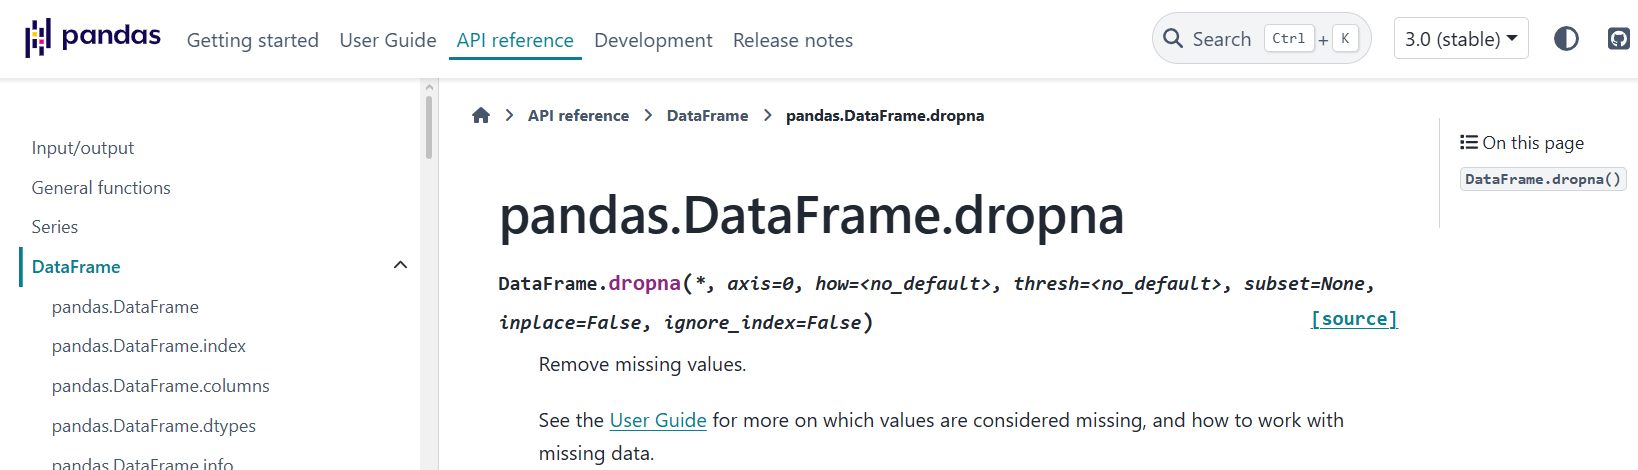

In [3]:
data = data.dropna().reset_index(drop=True)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





## Задача 1. Предсказание длины плавника по массе тела

Создадим новый датафрейм, в котором будет две колонки из данных: масса тела и длина плавника. Разобьем его на две переменные X и y. Мы будем решать задачу предсказания длины плавника пингвина по массе его тела, поэтому признаком Х будет масса тела, а признаком y — длина плавника.

In [4]:
X = data[['body_mass_g']]
y = data['flipper_length_mm']

Разобьем выборку на тренировочную и тестовую:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные на плоскости:

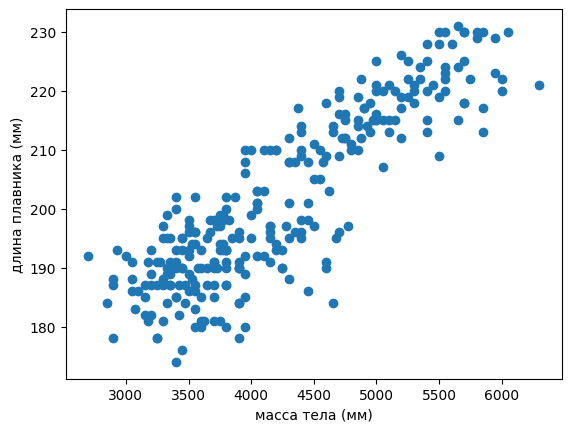

In [6]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('масса тела (мм)');
plt.ylabel('длина плавника (мм)');

plt.show()

Обучим модель линейной регрессии. Модель будет учиться предсказывать величину y (длину плавника) по величине X (массе тела).

Мы будем использовать линейную регрессию из библиотеки sklearn. Вот ссылка на ее докумнтацию: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# заводим модель линейной регрессии
lr = LinearRegression()

# обучим линейную регрессию
lr.fit(X_train, y_train)

LinearRegression()

Выведем значения коэффициентов линейной регрессии.
- lr.coef_ — коэффициент, соответствующий признаку X ($k_1$),
- lr.intercept_ — свободный член ($k_0$).

In [9]:
lr.coef_, lr.intercept_

(array([0.01525733]), np.float64(136.8526640670487))

Визуализируем данные и прямую, которую выражает модель.

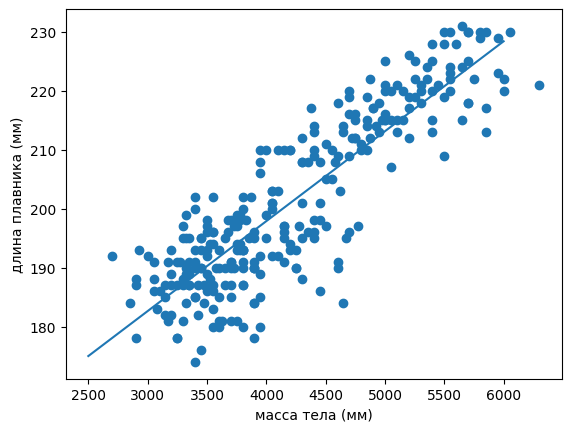

In [10]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = k_1*x_1 + k_0
def f_line(x):
  return  lr.coef_ * x + lr.intercept_

x = [2500, 6000]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Теперь визуализируем точки тестовой выборки и прямую, которую выражает модель:

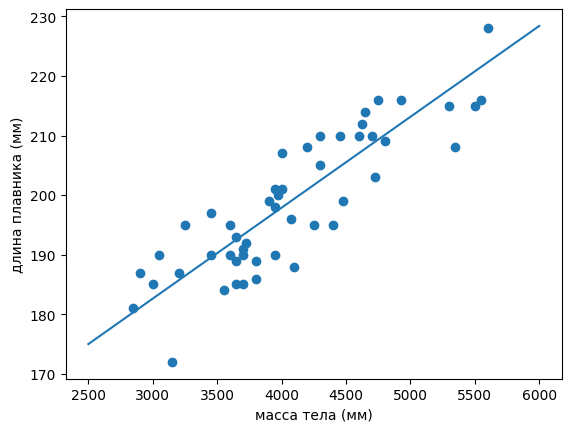

In [11]:
# визуализируем точки тестовой выборки
plt.scatter(X_test, y_test)

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
  return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Получим предсказания линейной регрессии на тренировочной и тестовой выборках:

In [12]:
# предсказание линейной регрессии для элементов тренировочной выборки
y_train_predicted = lr.predict(X_train)
# предсказание линейной регрессии для элементов тестовой выборки
y_test_predicted = lr.predict(X_test)

In [13]:
np.array(y_test)

array([201., 195., 200., 196., 199., 197., 189., 214., 187., 189., 205.,
       172., 195., 208., 190., 190., 190., 228., 201., 190., 185., 185.,
       212., 210., 203., 210., 193., 192., 215., 216., 210., 181., 190.,
       195., 209., 199., 216., 188., 184., 186., 210., 195., 185., 215.,
       198., 216., 191., 187., 207., 208.])

In [14]:
np.array(y_test_predicted)

array([197.11912425, 203.98492351, 197.50055754, 199.02629071,
       205.12922339, 189.49045841, 192.54192474, 207.79925644,
       185.67612548, 194.8305245 , 202.45919035, 184.9132589 ,
       191.77905816, 200.93345718, 189.49045841, 191.77905816,
       197.11912425, 222.29372155, 197.88199084, 193.30479133,
       193.30479133, 192.54192474, 207.41782315, 202.45919035,
       208.94355631, 207.03638985, 192.54192474, 193.68622462,
       217.71652204, 209.32498961, 208.56212302, 180.33605939,
       183.38752573, 201.69632376, 210.08785619, 196.35625767,
       221.53085496, 199.40772401, 191.01619158, 194.8305245 ,
       204.7477901 , 186.43899207, 182.62465914, 220.76798838,
       197.11912425, 211.99502265, 193.30479133, 181.09892598,
       197.88199084, 218.47938862])

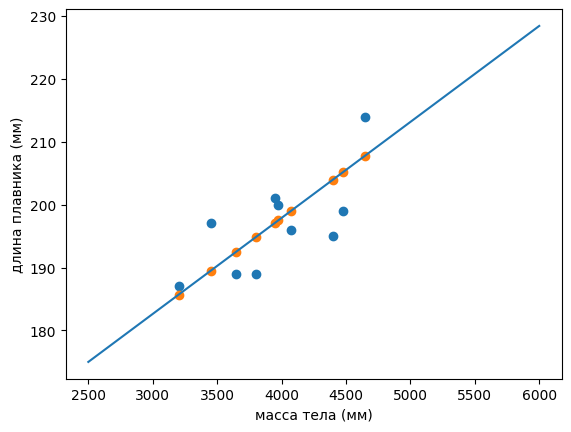

In [15]:
# визуализируем точки тестовой выборки
plt.scatter(X_test[:10], y_test[:10])

# визуализируем предсказания линейной регрессии
plt.scatter(X_test[:10], y_test_predicted[:10])

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
  return  lr.coef_ * x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Посчитаем метрики качества MAE и MSE для тренировочной и тестовой выборок. Мы будем использовать для этого функции из sklearn.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(5.645978803850728, 5.023831894892178)

In [18]:
np.mean(np.abs(y_train_predicted - y_train))

np.float64(5.645978803850728)

In [19]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(48.78542944970301, 34.24818715075173)

In [20]:
np.mean((y_train_predicted - y_train)**2)

np.float64(48.78542944970301)

## Задача 2. Предсказание длины плавника по массе тела и длине клюва

Посмотрим снова на наши данные:

In [21]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Запишем в переменную Х признаки, по которым мы будем предсказывать ответ ('масса тела', 'длина клюва'), а в переменную y — целевую переменную ('длина плавника'):

In [22]:
X = data[['body_mass_g', 'flipper_length_mm']]
y = data['bill_length_mm']

Также поделим данные на тренировочную и тестовую выборки:

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные в виде точек в трехмерном пространстве. По оси ОХ отложим значение признака "масса тела", по оси OY — значение признака "длина клюва", по оси OZ — ответ, т.е. значение переменной "длина плавника".

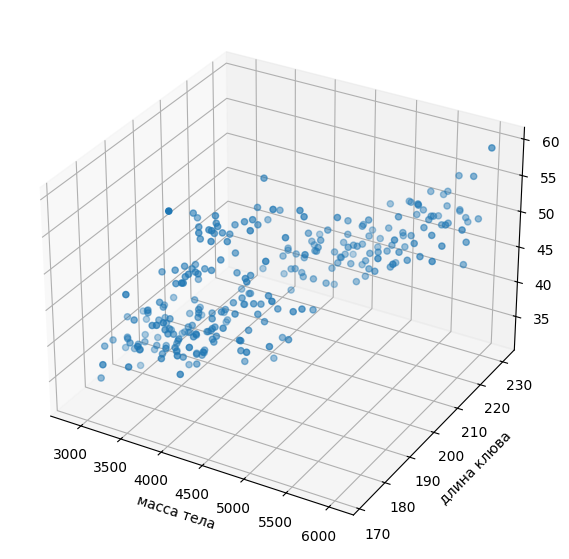

In [24]:
%matplotlib inline

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['body_mass_g']
y_points = X_train['flipper_length_mm']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Обучим модель линейной регрессии.

Здесь нам уже не нужно делать expand_dims для X_train, потому что он и так двумерный: в нем каждый элемент — это массив значений двух признаков.

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания:

In [26]:
y_train_predicted = lr.predict(X_train)

y_train_predicted

array([40.64810116, 42.51009302, 50.09418088, 41.8469685 , 42.82573257,
       47.48508159, 40.57863362, 43.05161254, 49.66848969, 40.83924735,
       42.58829924, 50.69361455, 50.80944288, 50.06233545, 40.72341903,
       47.6906695 , 47.69644618, 38.9482984 , 48.66365688, 39.01776593,
       42.81706754, 38.21274435, 42.15683136, 46.17038592, 42.4782476 ,
       43.73214077, 46.40204256, 41.76876229, 45.74180639, 44.19834241,
       41.33151773, 40.72053068, 37.80734521, 42.30161677, 43.54099457,
       41.01587818, 42.17416142, 51.44072198, 41.56317438, 40.35275366,
       41.24753483, 48.46962235, 41.22146609, 48.8866485 , 39.97919995,
       42.3102818 , 41.49948353, 45.11341563, 49.92043839, 41.98886556,
       48.21767365, 41.84119182, 45.70707262, 51.58261904, 50.06811214,
       39.95313121, 40.35853034, 40.07473622, 47.63275534, 42.87498171,
       40.13265038, 46.82773375, 45.41750181, 45.97057469, 40.52938449,
       45.05550147, 44.80066442, 40.70023863, 48.17427485, 40.42

Теперь визуализируем плоскость, которую задает регрессия.

Выведем коэффициенты, которые модель поставила в соответствие признакам.
- coef_ — это коэффициенты $k_1$ и $k_2$, соответствующие двум признакам в нашем датасете ("масса тела" и "длины клюва")
- intercept_ — это ксвободный член, коэффициент $k_0$

In [27]:
lr.coef_, lr.intercept_

(array([0.00115828, 0.19981122]), np.float64(-1.1180741647669095))

Зададим уравнение плоскости, которую задает линейная регрессия:
$$y = k_1 \cdot (масса \ тела) + k_2 \cdot (длина \ клюва) + k_0$$

In [28]:
def f_plane(x1, x2):
    return lr.coef_[0] * x1 + lr.coef_[1] * x2 + lr.intercept_

# то же самое можно было записать в виде lambda-функции:
# f_plane = lambda x1, x2: lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

## Задача 3. Предсказание массы тела по всем остальным признакам

Наконец, давайте решим более сложную задачу: предсказние массы тела пингвина по остальным пяти его признакам из датасета.

In [29]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Разделим данные на признаки и целевую переменную:

In [30]:
X = data.drop(columns=['body_mass_g'])
y = data['body_mass_g']

In [31]:
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,male,2007


In [32]:
X = pd.get_dummies(data=X, drop_first=True)
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].map({True: 1, False: 0})

X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,2007,0,0,0,1,0
3,36.7,19.3,193.0,2007,0,0,0,1,0
4,39.3,20.6,190.0,2007,0,0,0,1,1


Поделим данные на train и test:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Обучим линейную регрессию на тренировочной части:

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания линейной регрессии на тренировочной и тестовой частях датасета:

In [36]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

Посчитаем MAE и MSE

In [37]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(223.03731013204867, 253.0250819915248)

In [38]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(77038.91982996912, 100006.48641311577)

### Оценка важности признаков линейной регрессии

Давайте еще раз посмотрим на наши признаки и на коэффициенты, которые линейная регрессия поставила в соответствие каждому из них:

In [39]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
40,39.6,18.8,190.0,2007,0,0,1,0,1
139,39.0,18.7,185.0,2009,0,0,1,0,1
62,35.9,16.6,190.0,2008,0,0,0,1,0
59,41.6,18.0,192.0,2008,0,0,0,0,1
130,35.6,17.5,191.0,2009,0,0,1,0,0


In [40]:
lr.coef_, lr.intercept_

(array([  18.58241696,   67.03732893,   17.7274103 ,  -39.1960753 ,
        -318.91930377,  911.40203996,  -29.86867666,  -60.23608518,
         381.33389698]),
 np.float64(76928.72236643663))

In [41]:
for i, feature in enumerate(X_train.columns):
    print(feature, ' '*(19-len(feature)), '|  ', 'k_'+str(i+1), '  |  ', lr.coef_[i])


bill_length_mm       |   k_1   |   18.582416962028006
bill_depth_mm        |   k_2   |   67.0373289281813
flipper_length_mm    |   k_3   |   17.727410303970334
year                 |   k_4   |   -39.19607530015803
species_Chinstrap    |   k_5   |   -318.91930377160094
species_Gentoo       |   k_6   |   911.4020399608802
island_Dream         |   k_7   |   -29.868676657648596
island_Torgersen     |   k_8   |   -60.236085184433364
sex_male             |   k_9   |   381.3338969774346


Модули значений коэффициентов линейной регрессии отражают важности признаков. т.е. насколько важную роль признак играет в получении ответа моделью линейной регрессии.

Однако нельзя считать, что чем больше модуль коэффициента при признаке, тем больше его важность. Вот почему:

Уравнение линейной регрессии в данном случае имеет вид:

$$ y = k_5x_5 + k_4x_4 + k_3x_3 + k_2x_2 + k_1x_1 + k_0$$

Посмотрим на признаки "вид" ($k_1$) и "длина плавника" ($k_5$) и на коэффициенты, которые им соответствуют.

Может показаться, что, раз коэффицент для признака $k_1$ больше по модулю, чем для признака $k_5$, то признак $k_1$ играет бОльшую роль в предсказании массы тела, чем признак $k_5$. Однако это не так. Посмотрим на то, а каких границах варьируются значения признаков $k_1$ и $k_5$:
- у $k_1$ всего 3 варианта значения: 0, 1 и 2. Поэтому значение $k_1x_1$ будет варьироваться от 0 до примерно 300-600
- у $k_5$ много вариантов значений, но все они лежат в диапазоне [174, 230]. Поэтому значение $k_5x_5$ будет лежать в диапазоне $\sim $ [6500, 900]

Получается, для любого элемента датасета значение $k_5x_5$ больше, чем $k_1x_1$. Более того, изменение значения признака $k_1$ меняет значение $k_1x_1$ где-то на 250, а изменение значения признака $k_5$ может менять значение $k_5x_5$ на 1000 или больше.

Получается, величина $k_5x_5$ может сильнее изменять ответ, чем величина $k_1x_1$ и значение признака $k_5$ сильнее влияет на итоговый ответ, чем значение признака $k_1$.

Иными словами, масса тела пингвина сильнее связана с длиной плавника пингвина, чем с видом пингвина.

In [42]:
X_train['flipper_length_mm'].min(), X_train['flipper_length_mm'].max()

(174.0, 231.0)

### Сравнение линейной регрессии и KNN

В заключение давайте сравним качества моделей линейной регрессии и алгоритма k ближайших соседей на нашей задаче предсказания массы тела пингвина по другим его характеристикам.

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn = KNeighborsRegressor(n_neighbors=5)

In [45]:
knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [46]:
y_train_predicted_lr = lr.predict(X_train)
y_test_predicted_lr = lr.predict(X_test)

MAE и MSE на train выборке для KNN:

In [47]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(221.51943462897526, 80500.88339222615)

MAE на и MSE train выборке для LR:

In [48]:
mean_absolute_error(y_train_predicted_lr, y_train), mean_squared_error(y_train_predicted_lr, y_train)

(223.03731013204867, 77038.91982996912)

MAE и MSE на test выборке для KNN:

In [49]:
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(291.1, 132055.5)

MAE и MSE на test выборке для LR:

In [50]:
mean_absolute_error(y_test_predicted_lr, y_test), mean_squared_error(y_test_predicted_lr, y_test)

(253.0250819915248, 100006.48641311577)

Видим, что результаты работы алгоритмов разные, но отличаются не сильно. О том, как при решении задачи выбрать лучшую модель, вы узнаете на следующих занятиях.